# 2018-02-04 Econ 113 Analyzing Growth

## Setting up the Python/Jupyter environment

In [1]:
%%javascript

IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;}

<IPython.core.display.Javascript object>

In [2]:
# keep output cells from shifting to autoscroll: little scrolling
# subwindows within the notebook are an annoyance...

# Tools: Analyzing Growth

* Economics gives us numbers: prices and quantities over time
* Proportional growth—compound interest
    * The time over which some growth process takes place
    * The rate at which growth (or shrinkage) takes place
    * The amount that the variable grows to
        * T, g, y… with little t standing in for any potential moment
* Don’t get snowed! Accurately assess how important or consequential things are!

----

&nbsp;

## The Usefulness of Math

**Listen to Richard Feynman**:

<img src="http://delong.typepad.com/.a/6a00e551f08003883401b8d2d73444970c-pi" alt="Richard Feynman" title="richard_feynman_-_Google_Search.png" border="0" width="250" style="float:left; padding-right:10px; padding-bottom:10px" />

>To make calculations, the Maya had invented a  
system of bars and dots to represent numbers…  
rules… to calculate and predict… the risings  
and settings of Venus…. Only a few Maya priests  
could do such elaborate calculations…. 

>Suppose we were to ask one of them how to do  
just one step in the process of predicting when  
Venus will next rise as a morning star—subtracting  
two numbers….. How would the priest explain?….

>He could either teach us the… bars and dots and  
the rule… or he could tell us what he was really doing: 

>>Suppose we want to subtract 236 from 584.  
First, count out 584 beans and put them in  
a pot. Then take out 236 beans and put them  
to one side. Finally, count the beans left  
in the pot. That number is the result…

>You might say, ‘My Quetzalcoatl! What  
tedium… what a job!’ 

>To which the priest would reply:

>>That’s why we have the rules…. The rules  
are tricky, but they are a much more efficient  
way of getting the answer…. We can predict  
the appearance of Venus by counting beans  
(which is slow, but easy to understand) or  
by using the tricky rules (which is much  
faster, but you must spend years in school to  
learn them)…

----

&nbsp;

<img src="http://delong.typepad.com/.a/6a00e551f08003883401b7c94cc724970b-pi" alt="Muhammad ibn Musa al-Khwarizmi" title="Muhammad_ibn_Musa_al-Khwarizmi_-_Wikipedia.png" border="0" width="250" style="float:left; padding-right:10px; padding-bottom:10px" />

**Muḥammad ibn Mūsā al-Khwārizmī (c. 780-850)**:

* _Al-Kitāb al-Mukhtaṣar fī Hisāb al-Jabr wa’l-Muḳābala_
    * The Compendious Book on Calculation by  
Restoration and Balancing
* Worked in Baghdad at the House of Wisdom established  
by the Kalif Al-Mamun
* Why "al_Khwārizmī"?
    * Muhammed = "the praiseworthy, the glorified"
    * Mose = "is born" (Thutmose = "Thoth is born")
    * How many Muhammed ibn Mūsās were wandering  
around ninth century Baghdad?
* Algorithm...

----

&nbsp;

<img src="http://delong.typepad.com/.a/6a00e551f08003883401b7c94cc72a970b-pi" alt="Isaac Newton" title="Isaac_Newton_-_Wikipedia.png" border="0" width="250" style="float:left; padding-right:10px; padding-bottom:10px" />

**Isaac Newton (1642-1727)**: 

* _Philosophiæ Naturalis Principia Mathematica_
    * _Mathematical Principles of Natural Philosophy_
* Worked in Cambridge at the university there
    * Except when he fled the plague...
* Arithmetic and accounting
* Algebra and calculus
* What-if machines—ways of doing a huge number  
of potential calculations all at once…

----

&nbsp;

## Exponential Growth

$ \frac{dy}{dt} = g(y - a)  $

* g = 0.01
* a = 10
* Start at t = -500 with y = a + 0.00674
* Does nothing for a long time—stays very near 10—  
then explodes
    * and keeps on exploding...
* Let's see:

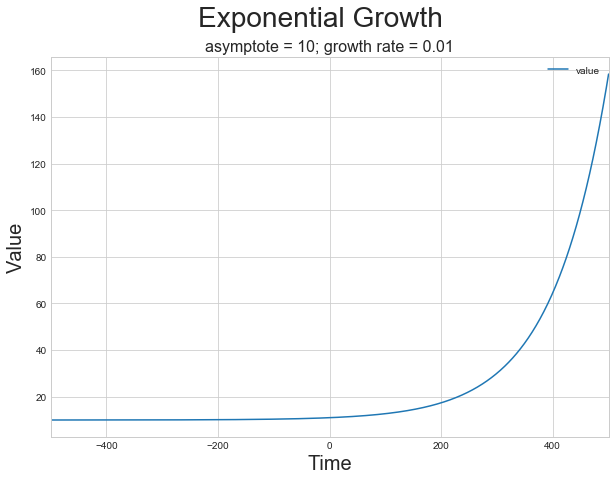

In [3]:
# make sure graphs are displayed in main notebook
%matplotlib inline  

import numpy as np                 # make sure libraries are
import pandas as pd                #  in the namespace
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import Image

plt.style.use('seaborn-whitegrid') # graphics setup
figure_size = plt.rcParams["figure.figsize"]
figure_size[0] = 10
figure_size[1] = 7
plt.rcParams["figure.figsize"] = figure_size

a = 10                             # set the initial asymptote
g = 0.01                           # set the growth rate
array = np.zeros((1001,2))         # initialize an array
exponential_function_df = pd.DataFrame(array, 
    columns=["time","value"])      # create a dataframe

# calculate values for the exponential function

for t in range(-500,501, 1):
    exponential_function_df.time[t+500] = t
    exponential_function_df.value[t+500] =  a + np.exp(g*t)
    
exponential_function_df = exponential_function_df.set_index("time")
exponential_function_df.plot()     # and graph

plt.ylabel("Value", fontsize=20)   # set labels
plt.xlabel("Time", fontsize=20)
plt.suptitle("Exponential Growth", fontsize=28)
plt.title("asymptote = 10; growth rate = 0.01", fontsize=16)

**Math presentation can be ugly inline**:

* dy/dt = g(y - a)
* y = 10 + exp(0.01(t-10))

&nbsp;

**Or prettier**:

(1)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \frac{dy}{dt} = d(y - a)  $

(2)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ y = 10 + e^{0.01(t-10}  $

----

&nbsp;

**Rule of 72 for Exponential Growth**:

* Rules of thumb for a growth rate g:
    * (y-a) compounded continuously doubles every 0.693/g periods
    * (y-a) grows a thousandfold every 6.91/g periods
* But we use the _Rule of 72_:
    * Why? 72 has many divisors
    * Why? 69.3—ln(2)—is for continuous compounding
    * Let's see:
* Why is the thousandfold time ten times the doubling time?
    * 1024 = 2^10
    * ln(1024) = 10 * ln(2)

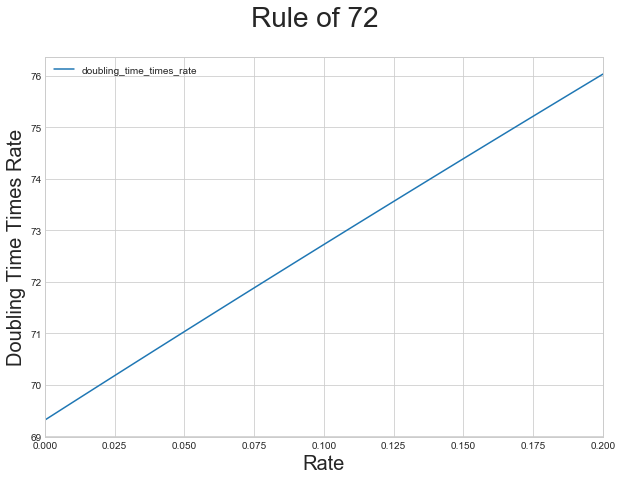

In [4]:
array = np.zeros((21,2))         # initialize an array
rule_of_72_df = pd.DataFrame(array, 
    columns=["rate","doubling_time_times_rate"])      # create a dataframe

rule_of_72_df.rate[0] = 0
rule_of_72_df.doubling_time_times_rate[0] = np.log(2)*100

for i in range(1, 21):
    rule_of_72_df.rate[i] = i*.01
    rule_of_72_df.doubling_time_times_rate[i] = (i * 
        np.log(2)/np.log(1 + i*.01))

rule_of_72_df = rule_of_72_df.set_index("rate")
rule_of_72_df.plot()
plt.ylabel("Doubling Time Times Rate", fontsize=20)   # set labels
plt.xlabel("Rate", fontsize=20)
plt.xlim(0,)
plt.suptitle("Rule of 72", fontsize=28)

For compounded growth rates of between 6.5% and 9.5% per period,  
the product of the doubling time and the growth rate is closer  
to 72 than to any other integer...

----

&nbsp;

**"exp" "E"**

* It’s a function: we feed it a number x, and get out exp(x) (or E^x)
* We can calculate it:
    * exp(x) = 1+x+(x^2)/2+(x^3)/6+(x^4)/24+…
    * exp(0)=1
    * exp(1)=2.71828182846…
* But we don’t have to…
    * Over 1618-1731, Napier, Oughtred, Bernoulli, Leibnitz,  
and Euler did it for us…

## Exponential Convergence

(dy/dt) = g(k - y)

* start at t = 0 with y = 0
* g = 0.01; k = 100
* heads rapidly for k
* and then stays there
* (k-y) halves in… 
    * …guess what? 72/g
* (k-y) shrinks to a thousandth of its initial value in… 
    * …guess what? 7.2/g
* Let's see:

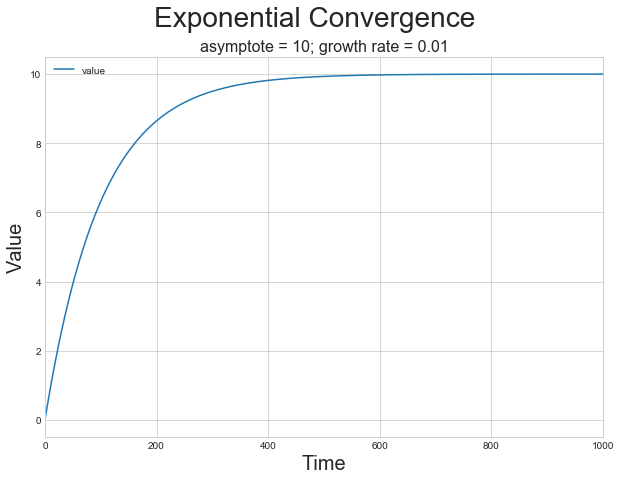

In [5]:
k = 10                             # set the final asymptote
g = 0.01                           # set the growth rate
array = np.zeros((1001,2))         # initialize an array
exponential_function_df = pd.DataFrame(array, 
    columns=["time","value"])      # create a dataframe

# calculate values for the exponential function

for t in range(0, 1001, 1):
    exponential_function_df.time[t] = t
    exponential_function_df.value[t] =  k + (0 - k) * np.exp(-g*t)
    
exponential_function_df = exponential_function_df.set_index("time")
exponential_function_df.plot()     # and graph

plt.ylabel("Value", fontsize=20)   # set labels
plt.xlabel("Time", fontsize=20)
plt.suptitle("Exponential Convergence", fontsize=28)
plt.title("asymptote = 10; growth rate = 0.01", fontsize=16)

----

&nbsp;

## Logistic Growth

* Suppose we want to combine:
    * (dy/dt) = g(y - a) when y is small…
    * (dy/dt) = g(k - y) when y is big…
* (dy/dt) = g(y-a)(1-y/k), for k >> a

(3)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \frac{dy}{dt} = g(y-a)\left(1-\frac{y}{k}\right)  $

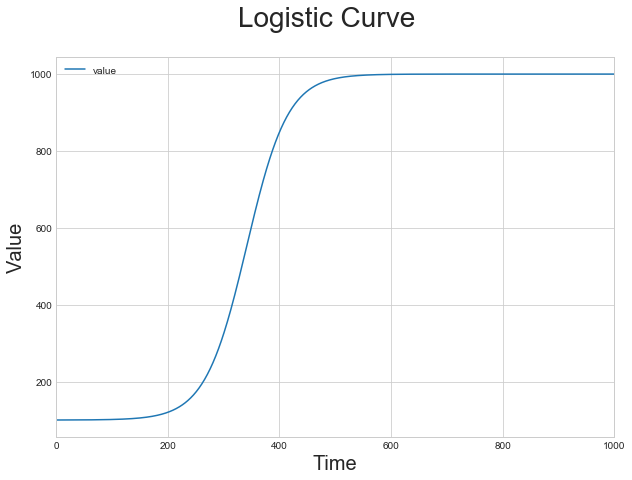

In [6]:
array = np.zeros((1001,2))         # initialize an array
logistic_df = pd.DataFrame(array, 
    columns=["time","value"])      # create a dataframe

a = 100
g = 0.03
k = 1000

logistic_df.time[0] = 0
logistic_df.value[0] = a + 0.1

for t in range(1,1001):
    logistic_df.time[t] = t
    logistic_df.value[t] = (logistic_df.value[t-1] + g * 
       (logistic_df.value[t-1]-a)*(1-logistic_df.value[t-1]/k))

logistic_df = logistic_df.set_index("time")
logistic_df.plot()
plt.ylabel("Value", fontsize=20)   # set labels
plt.xlabel("Time", fontsize=20)
plt.suptitle("Logistic Curve", fontsize=28)

----

&nbsp;

# Growth: Things to Remember

* Asymptote: a (in the negative direction, for growth and logistic)
* Asymptote: k (in the positive direction, for convergence and logistic)
* **Rule of 72**: 72 divided by the growth rate gives you:
    * the doubling time (for growth) 
    * or halving (for convergence) time
    * Why 72? Why not 0.693?
        * 72 is easier to do in your head: 
            * 72 = 36x2 = 24x3 = 18x4 = 12x6 = 9x8
        * If things aren’t continuous but come in steps…
* **Rule of 720**: 1000-fold time is 10 times doubling time

<https://github.com/braddelong/LSS18E101b/blob/master/2018-02-04_Econ%20113%20Analyzing%20Growth.ipynb>